In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
len(image_paths)

44123

In [4]:
data_imgs = O.DataHelper.get2D(N=5000, config_num=8)

DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>


In [5]:
len(data_imgs)

5000

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [14]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

27 [2481903  163397 1264893  268975  211548]
32 [2698978   40147 1494232   91529   65830]
33 [2990546   39616 1200687  112504   47363]
69 [2199477   39560 1610814  391793  149072]
89 [2984187   15041 1257035   88925   45528]
132 [2173416   82777 1364339  600075  170109]
134 [2835843   26014 1480332   15078   33449]
139 [2488732  273168 1198064  282326  148426]
149 [2212005  148487 1565649  333245  131330]
185 [2158564  198374 1532243  434445   67090]
186 [2566106  150249 1183737  399749   90875]
238 [2642736   17310   28103 1661277   41290]
243 [3329163    9221   29480  999697   23155]
268 [2571190  192233 1087131  369285  170877]
296 [2168502  102666 1697818  295124  126606]
330 [2776107   93859 1056105  274824  189821]
353 [3588815     131  382499  419270       1]
355 [3340295   10432   13164  978089   48736]
425 [2310334  144615 1528236  266425  141106]
430 [2658427  140501 1164713  270501  156574]
436 [2617702  283514 1008154  438880   42466]
468 [2263272   45989 1450041  534811   

In [15]:
len(bad_images)

218

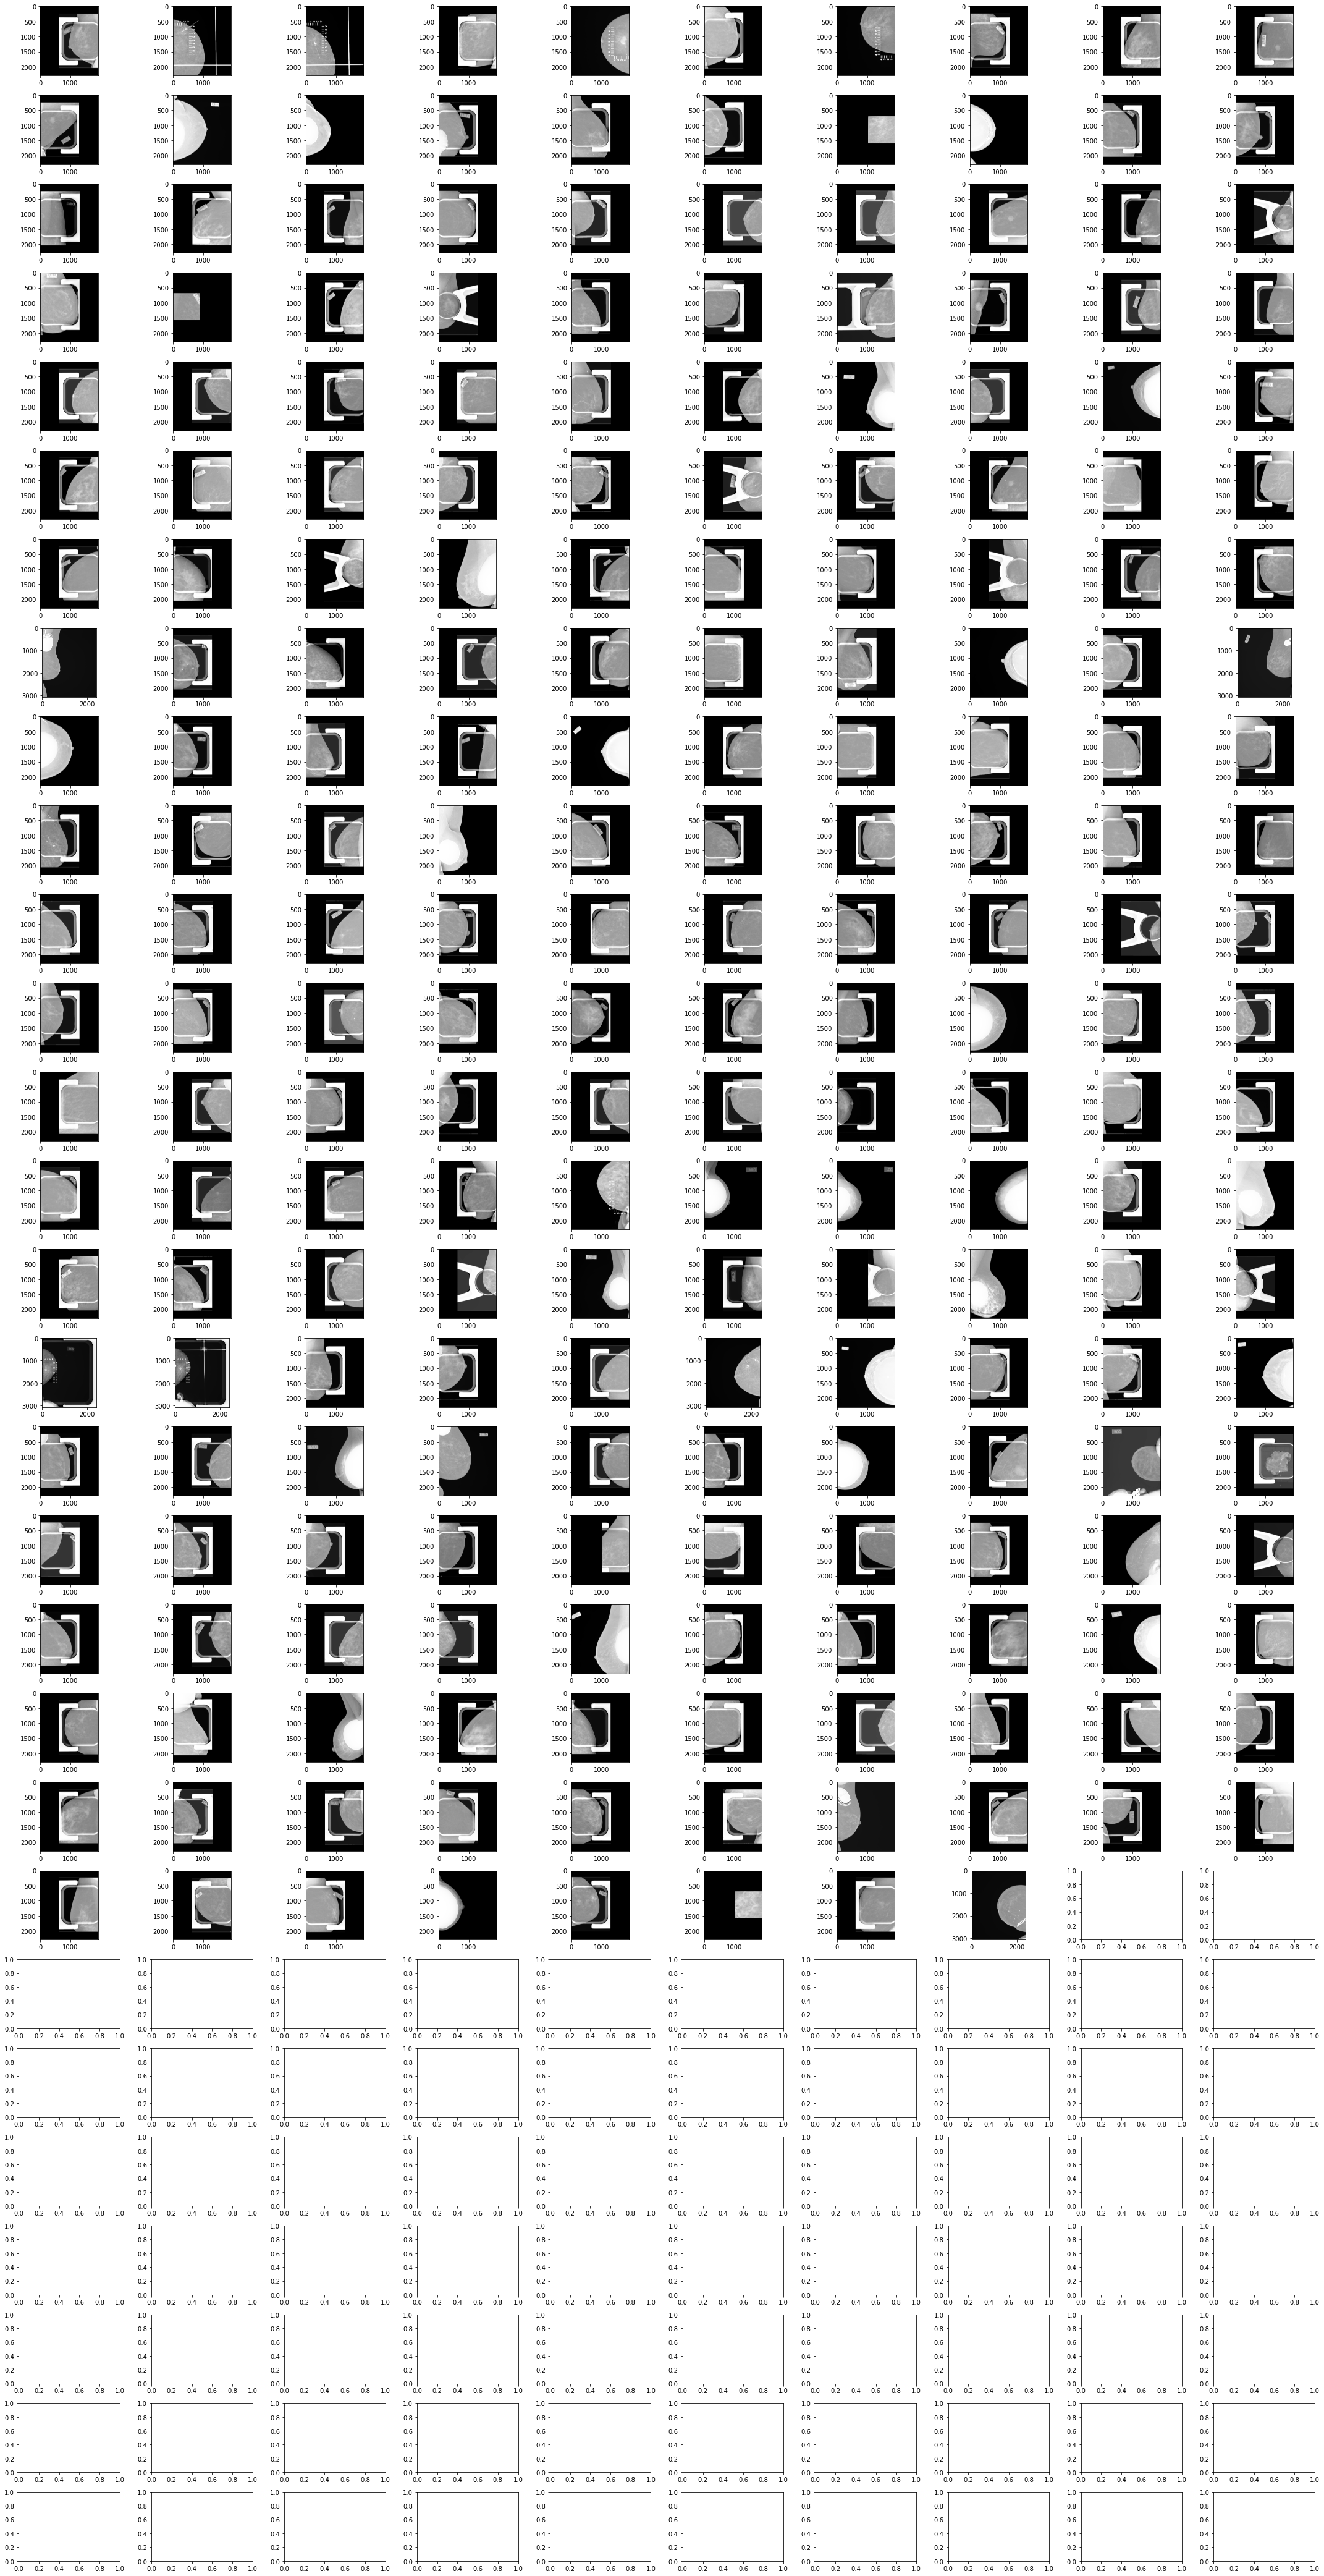

In [10]:
O.DataHelper.view_grid(bad_images, ncols=10)

In [13]:
paths

['/raid/data01/deephealth/dh_dcm_ast/2.25.100257558441829217830869530921901261278/DXm.2.25.122074465734741746706955195458396492859',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100290090557015004282341117448173003433/DXm.2.25.145073787325764149610466456418871231507',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100290090557015004282341117448173003433/DXm.2.25.243451088365957811849583057503746599598',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100564204358015724998172116281700062899/DXm.2.25.252871617365779451237926208160172410914',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.100685205306132808775831547985577491038/DXm.2.25.128425501478566363620493231236211637701',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.10102324920334817175561414010707262756/DXm.2.25.102697506693032509061188338523228695274',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.101028557294428785340540641547561618854/DXm.2.25.260456858102161878381528978526678491474',
 '/raid/data01/deephealth/dh_dcm_ast/2.25.1010467472153017619078280072

In [17]:
import datetime
import os
feature = "hist"
norm = "minmax"
LOG_DIR = "."
date_and_time = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
file_name = f"{date_and_time}_{feature}_{norm}.txt"
# if the log directory does not exist, create it
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
# write the paths to the file in the log directory
with open(os.path.join(LOG_DIR, file_name), 'w') as f:
    for path in paths:
        f.write(f"{path}\n")

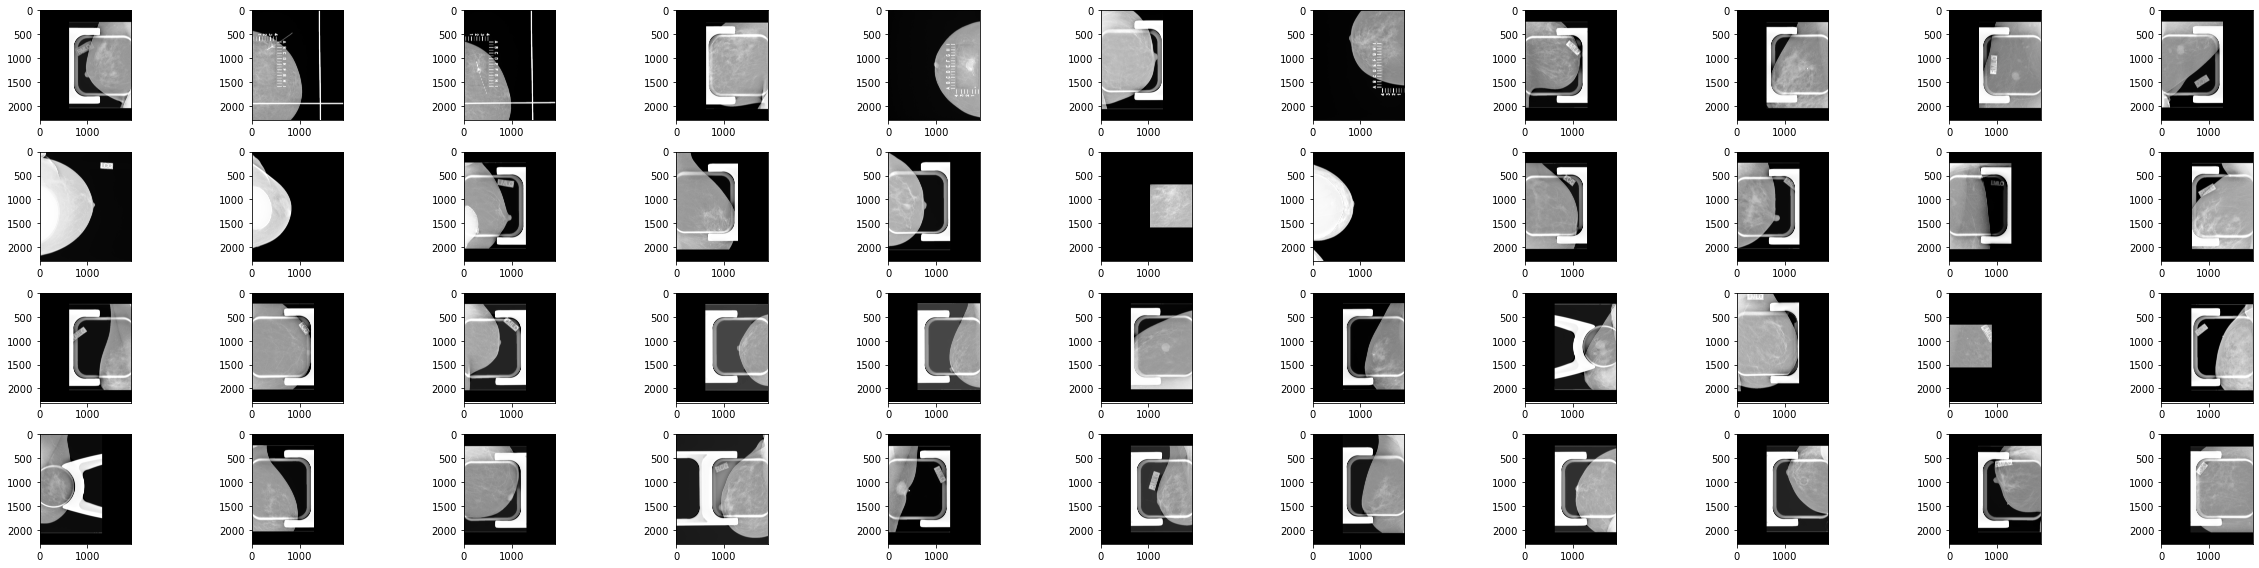

In [10]:
O.DataHelper.view_grid(bad_images)